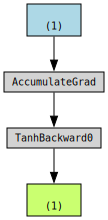

In [7]:
import torch
from torchviz import make_dot

n = torch.Tensor([2.0]).float()
n.requires_grad = True
o = torch.tanh(n)
o.data.item()
o.backward()
make_dot(o)

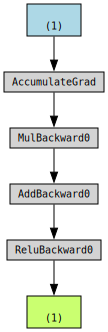

In [8]:
import torch

x = torch.tensor([1.0], requires_grad=True)
y = x * 2 + 1
o = torch.relu(y)
make_dot(o)

In [9]:
import torch

# Define your input data
x = torch.tensor([1.2, 2.50])
b = torch.rand(2, requires_grad=True)
W = torch.rand(2, requires_grad=True)  # Weight

# Define your target (output) variable
target = torch.tensor([100., 200.])

# Define your model (simple linear model)
def model(x, W, b):
    return W * x + b

lr=0.01

# Optimizer
optimizer = torch.optim.SGD([W, b], lr=lr)

# Training loop
for epoch in range(100):
    
    #optimizer.zero_grad()
    if W.grad is not None:
        W.grad.zero_()
    if b.grad is not None:
        b.grad.zero_()

    pred = model(x, W, b)
    loss = sum((target - pred) ** 2)
    loss.backward()

    #optimizer.step()
    W.data += -lr * W.grad
    b.data += -lr * b.grad

    # Print the loss every few epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}], Loss: {loss.item():.4f}")

# After training, your model's parameters (weights) will be updated
print(f"x: {x}")
print("Trained model parameters:")
print(f"W: {W.data}, b: {b.data}")


Epoch [10], Loss: 6279.7461
Epoch [20], Loss: 1550.9359
Epoch [30], Loss: 537.1760
Epoch [40], Loss: 196.0539
Epoch [50], Loss: 72.0169
Epoch [60], Loss: 26.4744
Epoch [70], Loss: 9.7332
Epoch [80], Loss: 3.5784
Epoch [90], Loss: 1.3156
Epoch [100], Loss: 0.4837
x: tensor([1.2000, 2.5000])
Trained model parameters:
W: tensor([48.9641, 68.7903]), b: tensor([40.5815, 28.0241])


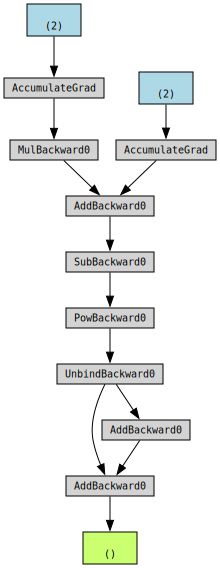

In [10]:
make_dot(loss)

In [11]:
import torch
from nntorch import Neuron, MLP

x = [2.0,3.0,-1.0]

# initialize a model 
m = MLP(3, [4, 4, 1]) # 2-layer neural network
print(m)
print("number of parameters", len(m.parameters()))

print(m(x))

xs = torch.tensor([
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
])

target = torch.tensor([1.0, -1.0, -1.0, 1.0]) # desired output

optimizer = torch.optim.SGD(m.parameters(), lr=0.001)


for epoch in range(1000):
    
    optimizer.zero_grad()

    pred = [m(x) for x in xs]
    loss = sum((t-p)**2 for p, t in zip(target, pred))
    loss.backward()

    optimizer.step()

    # Print the loss every few epochs
    if (epoch + 1) % 50 == 0:
        print(f"Epoch [{epoch + 1}], Loss: {loss.item():.4f}")

# After training, your model's parameters (weights) will be updated
print(f"pred: {[m(x).item() for x in xs]}")


MLP of [Layer of [ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3), ReLUNeuron(3)], Layer of [ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4), ReLUNeuron(4)], Layer of [LinearNeuron(4)]]
number of parameters 41
tensor([0.9701], grad_fn=<AddBackward0>)
Epoch [50], Loss: 1.9459
Epoch [100], Loss: 1.9155
Epoch [150], Loss: 1.9112
Epoch [200], Loss: 1.9081
Epoch [250], Loss: 1.9050
Epoch [300], Loss: 1.9020
Epoch [350], Loss: 1.8990
Epoch [400], Loss: 1.8961
Epoch [450], Loss: 1.8931
Epoch [500], Loss: 1.8901
Epoch [550], Loss: 1.8872
Epoch [600], Loss: 1.8843
Epoch [650], Loss: 1.8814
Epoch [700], Loss: 1.8785
Epoch [750], Loss: 1.8756
Epoch [800], Loss: 1.8728
Epoch [850], Loss: 1.8700
Epoch [900], Loss: 1.8671
Epoch [950], Loss: 1.8643
Epoch [1000], Loss: 1.8616
pred: [0.6043155193328857, -0.41142091155052185, -0.27601054310798645, 0.08656835556030273]


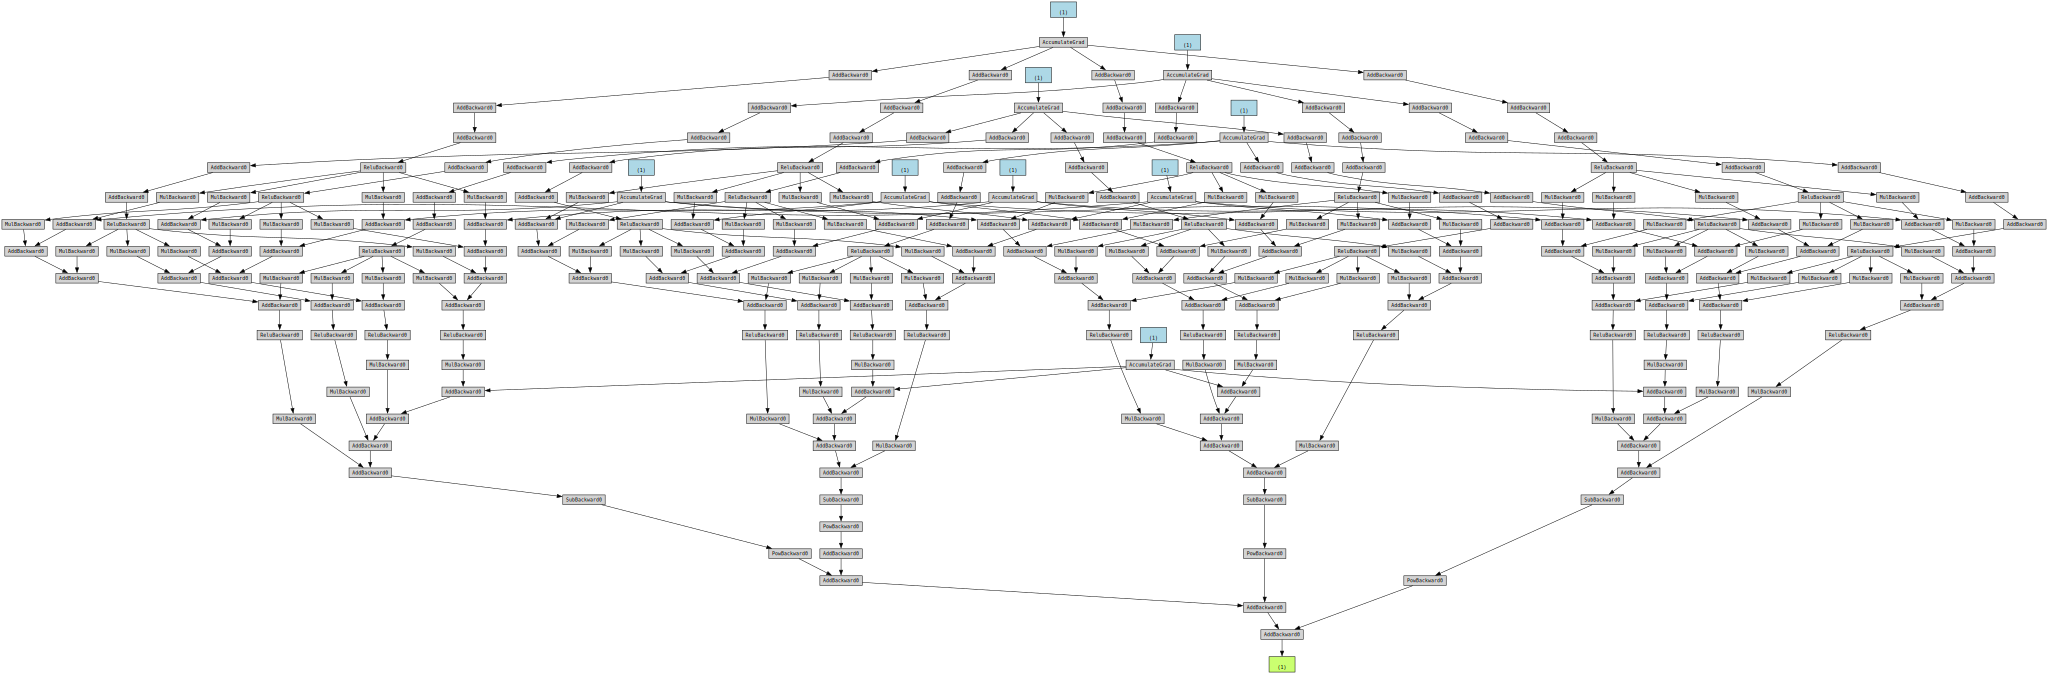

In [12]:
make_dot(loss)